<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_ml/ml09_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree(의사결정 나무)

## 분류(Classification)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris['data'][:, 2:]  # 꽃잎 길이/너비(petal length/width) 특성만 선택
y = iris['target']

In [3]:
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [4]:
y[:5]

array([0, 0, 0, 0, 0])

In [5]:
# 모델 선택
from sklearn.tree import DecisionTreeClassifier

In [6]:
# 모델 생성
tree_clf = DecisionTreeClassifier(random_state=1, )

In [7]:
# 모델 훈련
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [16]:
# Decision Tree의 결과를 파일(dot)로 export
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                out_file='iris.dot',
                feature_names=iris['feature_names'][2:],
                class_names=iris['target_names'],
                filled=True,
                rounded=True)

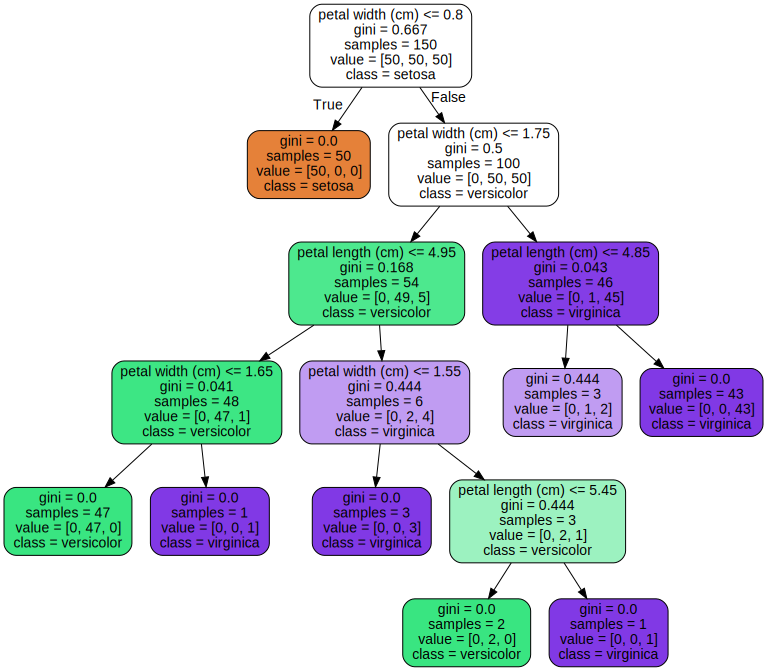

In [17]:
# dot 파일을 화면에 출력하기 위한 패키지
from graphviz import Source

Source.from_file('iris.dot')

In [20]:
# dot 파일을 이미지 파일로 저장하기 위한 패키지
import pydotplus

graph = pydotplus.graph_from_dot_file('iris.dot')
graph.write_png('iris.png')

True

* gini 계수: 샘플의 불순도
    * gini = 0: 100% 순수. (완벽하게 하나의 클래스로 분류된 상태)
    * gini 계수가 클 수록 서로 다른 클래스의 샘플들이 많이 섞여 있음.
* Decision Tree가 가지를 치는 기준(criterion) 중 하나: gini 계수가 최소가 되는 leaf를 찾는 방법.

In [28]:
# Tree의 depth를 제한 -> overfitting을 감소
tree_clf_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_2.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [29]:
export_graphviz(tree_clf_2,
                out_file='iris_2.dot',
                feature_names=iris['feature_names'][2:],
                class_names=iris['target_names'],
                filled=True,
                rounded=True)

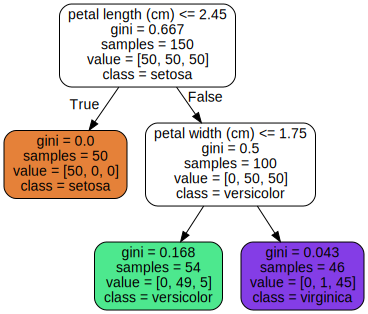

In [30]:
Source.from_file('iris_2.dot')

In [44]:
def plot_tree_boundary(X, y, model):
    # 샘플 데이터 시각화
    for cls, species in zip([0, 1, 2], iris['target_names']):
        plt.scatter(X[y == cls, 0], X[y == cls, 1], label=species)
    # plt.vlines(x=2.45, ymin=0, ymax=3)  # Tree 가지치기 첫번째 기준
    # plt.hlines(y=1.75, xmin=2.45, xmax=7, color='r')  # Tree 가지치기 두번째 기준

    # 결정 경계면(decision boundary) 시각화
    x_min, y_min = np.min(X, axis=0)
    x_max, y_max = np.max(X, axis=0)
    # print(x_min, x_max, y_min, y_max)
    x_pts = np.linspace(start=x_min, stop=x_max, num=100)
    y_pts = np.linspace(start=y_min, stop=y_max, num=100)
    X_pts, Y_pts = np.meshgrid(x_pts, y_pts)
    X_new = np.c_[X_pts.ravel(), Y_pts.ravel()]
    y_new = model.predict(X_new).reshape(X_pts.shape)
    plt.contourf(X_pts, Y_pts, y_new, alpha=0.2)

    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend()
    plt.grid()

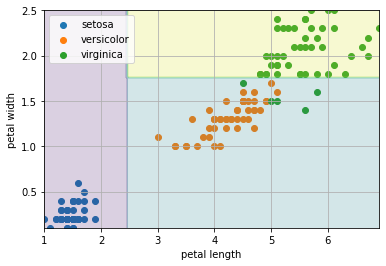

In [45]:
plot_tree_boundary(X, y, tree_clf_2)